<a href="https://colab.research.google.com/github/Desmondonam/Time_series/blob/main/Eval_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluation of time series models

When evaluating time series models, several evaluation metrics are used to assess the model's performance and accuracy in forecasting future values. The choice of evaluation metrics depends on the nature of the time series data and the specific problem being addressed. Here are some common evaluation metrics used in time series analysis:

**Mean Absolute Error (MAE):**
MAE measures the average absolute difference between the actual and predicted values. It gives equal weight to all errors, making it robust to outliers.

**Mean Squared Error (MSE):**
MSE measures the average squared difference between the actual and predicted values. It penalizes larger errors more than MAE, making it sensitive to outliers.

**Root Mean Squared Error (RMSE):**
RMSE is the square root of MSE and is often used as a more interpretable metric, as it is in the same units as the original data.

**Mean Absolute Percentage Error (MAPE):**
MAPE calculates the percentage difference between the actual and predicted values, making it useful for comparing forecasting accuracy across different time series.

**Symmetric Mean Absolute Percentage Error (sMAPE):**
sMAPE is a symmetric version of MAPE that considers both overestimation and underestimation errors.

**Percentage Error (PE):**
PE calculates the percentage difference between the actual and predicted values. Positive values indicate overestimation, while negative values indicate underestimation.

**Forecast Bias:**
Forecast bias measures the tendency of the model to consistently overestimate or underestimate the actual values.

**Mean Forecast Error (MFE):**
MFE calculates the average difference between the actual and predicted values, indicating the overall forecasting accuracy.

**Coefficient of Determination (R-squared or R²):**
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates how well the model fits the data.

**Theil's U Statistic:**
Theil's U is used to compare the forecast performance of two models or compare a model to a naïve forecast.

**Mean Absolute Scaled Error (MASE):**
MASE compares the accuracy of the model to the accuracy of a naïve forecast, providing a more interpretable measure of forecast accuracy.

Let's demonstrate how to perform evaluation metrics for time series forecasting using Python and some built-in datasets from the statsmodels library. We'll use the ARIMA model for forecasting and evaluate the model using various metrics.

In [1]:
!pip install numpy pandas matplotlib statsmodels

Mean Absolute Error (MAE): 1.18
Mean Squared Error (MSE): 2.08
Root Mean Squared Error (RMSE): 1.44
Mean Absolute Percentage Error (MAPE): 0.21
Coefficient of Determination (R-squared): -2.00


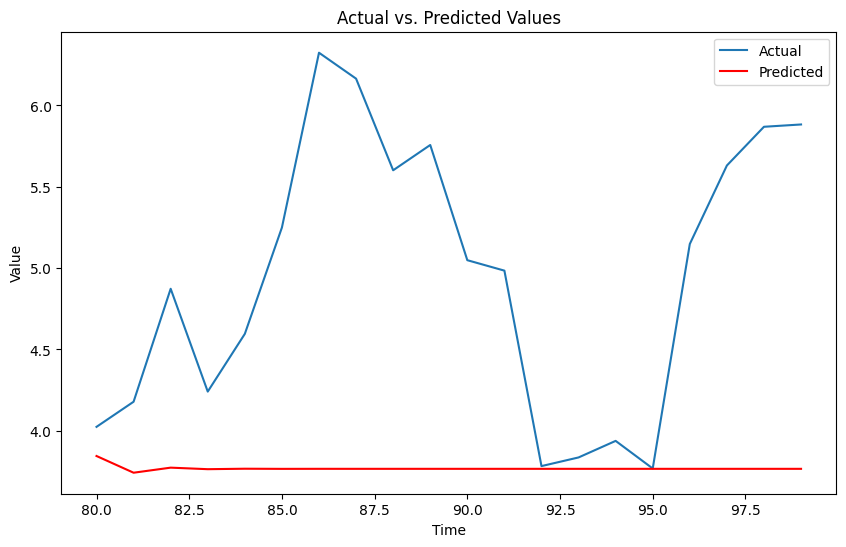

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Generate or use your time series data
# For demonstration, we'll create a simple time series with a seasonal pattern
np.random.seed(42)
n = 100
t = np.arange(n)
seasonal_pattern = np.sin(2 * np.pi * t / 12)
noise = np.random.normal(loc=0, scale=0.5, size=n)
time_series = 5 + seasonal_pattern + noise

# Split data into train and test sets
train_size = int(0.8 * n)
train_data = time_series[:train_size]
test_data = time_series[train_size:]

# Fit ARIMA model
p, d, q = 1, 1, 1
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast_values = model_fit.forecast(len(test_data))

# Evaluation Metrics
mae = mean_absolute_error(test_data, forecast_values)
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_data, forecast_values)
r_squared = r2_score(test_data, forecast_values)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")
print(f"Coefficient of Determination (R-squared): {r_squared:.2f}")

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(t[train_size:], test_data, label='Actual')
plt.plot(t[train_size:], forecast_values, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted Values')
plt.show()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Generate or use your time series data (same as before)
# ...

# Evaluation Metrics
# (Continuing from the previous code)

# Theil's U Statistic
theil_u = np.sqrt(np.mean((forecast_values - test_data)**2) / np.mean((test_data[1:] - test_data[:-1])**2))

# Forecast Bias
forecast_bias = np.mean(forecast_values - test_data)

# Print the evaluation metrics
# (Continuing from the previous code)

print(f"Theil's U Statistic: {theil_u:.2f}")
print(f"Forecast Bias: {forecast_bias:.2f}")

Theil's U Statistic: 2.35
Forecast Bias: -1.18
